In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\cybersecutity\GUIDE_Train.csv")
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [7]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

In [9]:
df.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [11]:
df.shape

(9516837, 45)

In [13]:
df.nunique

<bound method DataFrame.nunique of                     Id  OrgId  IncidentId  AlertId                 Timestamp  \
0         180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1         455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2        1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3        1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4         214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   
...                ...    ...         ...      ...                       ...   
9516832  1056561956622      0          90   496631  2024-06-08T15:26:08.000Z   
9516833  1228360650033     59      196410   748366  2024-06-06T09:40:08.000Z   
9516834   867583395122     44       14117     7425  2024-06-11T22:51:03.000Z   
9516835   395136991850     43         644     8973  2024-05-20T23:01:01.000Z   
9516836   678604833923     16      141721   644106  2024-06-03T23:51:52.000Z   

    

In [15]:
missing_values = df.isna().sum()
missing_percent = (missing_values/len(df))*100
print(missing_values)
print(missing_percent)

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

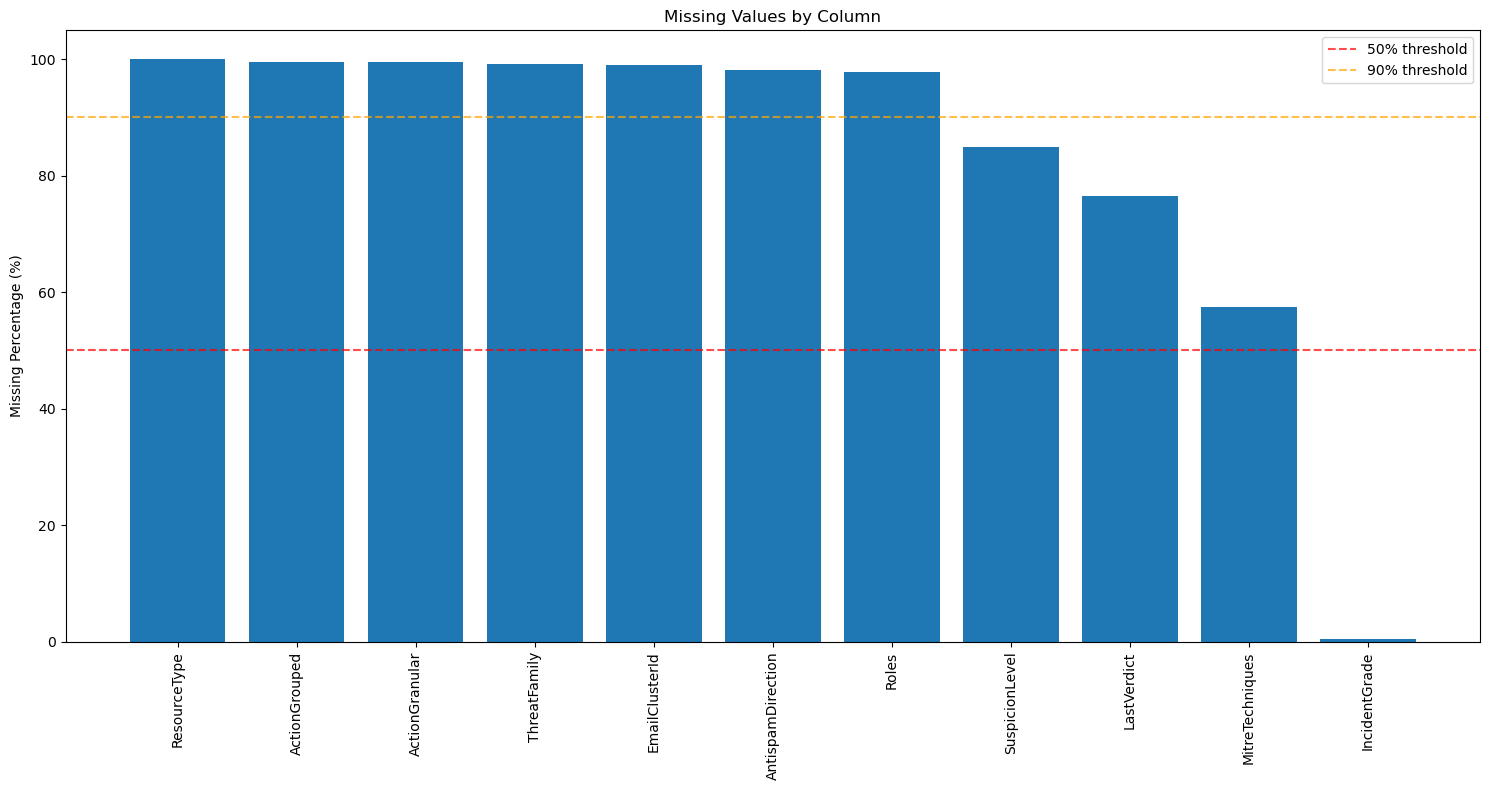

In [19]:
plt.figure(figsize=(15,8))

missing_percent = missing_percent[missing_percent>0].sort_values(ascending=False)

plt.bar(range(len(missing_percent)), missing_percent.values)
plt.xticks(range(len(missing_percent)), missing_percent.index, rotation=90)
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% threshold')
plt.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% threshold')
plt.ylabel('Missing Percentage (%)')
plt.title('Missing Values by Column')
plt.legend()
plt.tight_layout()
plt.show()


TARGET VARIABLE ANALYSIS - IncidentGrade
Distribution of IncidentGrade:
IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64

Percentage distribution:
IncidentGrade
BenignPositive    43.43
TruePositive      35.10
FalsePositive     21.47
Name: proportion, dtype: float64

Missing values in IncidentGrade: 51340 (0.54%)


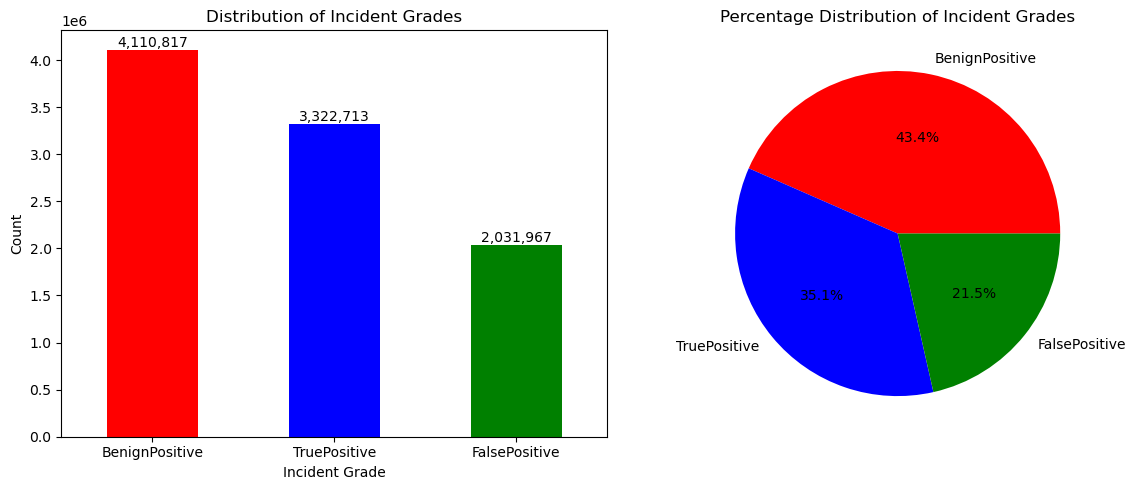


Unique values in IncidentGrade:
['TruePositive' 'FalsePositive' 'BenignPositive' nan]
Number of unique values: 3


In [21]:
# Check the correct target variable distribution
print("=" * 50)
print("TARGET VARIABLE ANALYSIS - IncidentGrade")
print("=" * 50)

# Check if target variable exists
if 'IncidentGrade' in df.columns:
    target_distribution = df['IncidentGrade'].value_counts()
    target_percentage = (df['IncidentGrade'].value_counts(normalize=True) * 100).round(2)
    
    print("Distribution of IncidentGrade:")
    print(target_distribution)
    print("\nPercentage distribution:")
    print(target_percentage)
    
    # Check for missing values
    missing_target = df['IncidentGrade'].isnull().sum()
    print(f"\nMissing values in IncidentGrade: {missing_target} ({missing_target/len(df)*100:.2f}%)")
    
    # Visualize the target distribution
    plt.figure(figsize=(12, 5))
    
    # Bar plot
    plt.subplot(1, 2, 1)
    colors = ['red', 'blue', 'green']  # Colors for different grades
    target_distribution.plot(kind='bar', color=colors)
    plt.title('Distribution of Incident Grades')
    plt.xlabel('Incident Grade')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add value labels on bars
    for i, value in enumerate(target_distribution.values):
        plt.text(i, value + 1000, f'{value:,}', ha='center', va='bottom')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(target_distribution.values, labels=target_distribution.index, 
            autopct='%1.1f%%', colors=colors)
    plt.title('Percentage Distribution of Incident Grades')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("ERROR: Target variable 'IncidentGrade' not found!")
    print("Available columns:", df.columns.tolist())

# Let's also check what values are in IncidentGrade
print("\nUnique values in IncidentGrade:")
print(df['IncidentGrade'].unique())
print(f"Number of unique values: {df['IncidentGrade'].nunique()}")

In [23]:
print("=" * 60)
print("COMPREHENSIVE COLUMN ANALYSIS")
print("=" * 60)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Analyze numerical columns
print("\n" + "=" * 60)
print("NUMERICAL COLUMNS ANALYSIS")
print("=" * 60)

for i, col in enumerate(numerical_cols, 1):
    print(f"\n{i}. {col}:")
    print(f"   Data type: {df[col].dtype}")
    print(f"   Missing values: {df[col].isnull().sum():,} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    print(f"   Unique values: {df[col].nunique()}")
    
    if df[col].nunique() < 20:  # If few unique values, show them
        print(f"   Values: {sorted(df[col].unique())}")
    else:
        print(f"   Range: {df[col].min()} to {df[col].max()}")
        print(f"   Mean: {df[col].mean():.2f}, Std: {df[col].std():.2f}")
    
    # Check if this might actually be a categorical column disguised as numerical
    if df[col].nunique() < 50:
        print(f"   Low cardinality - might be categorical")

# Analyze categorical columns
print("\n" + "=" * 60)
print("CATEGORICAL COLUMNS ANALYSIS")
print("=" * 60)

for i, col in enumerate(categorical_cols, 1):
    print(f"\n{i}. {col}:")
    print(f"   Data type: {df[col].dtype}")
    print(f"   Missing values: {df[col].isnull().sum():,} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
    print(f"   Unique values: {df[col].nunique()}")
    
    if df[col].nunique() <= 10:  # Show values if not too many
        print(f"   Values: {df[col].unique()}")
    elif df[col].nunique() <= 20:
        print(f"   Sample values: {df[col].unique()[:5]}...")
    else:
        print(f"   Most common: {df[col].value_counts().head(3).to_dict()}")

COMPREHENSIVE COLUMN ANALYSIS
Numerical columns (31): ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City']
Categorical columns (14): ['Timestamp', 'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']

NUMERICAL COLUMNS ANALYSIS

1. Id:
   Data type: int64
   Missing values: 0 (0.00%)
   Unique values: 730778
   Range: 0 to 1709396988938
   Mean: 842549402571.65, Std: 496249875038.85

2. OrgId:
   Data type: int64
   Missing values: 0 (0.00%)
   Unique v

In [25]:

df_clean = df.copy()

columns_to_drop = [
    'ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily',
    'ResourceType', 'Roles', 'AntispamDirection'
]

print(" Dropping columns with >90% missing data:")
for col in columns_to_drop:
    if col in df_clean.columns:
        missing_pct = df_clean[col].isnull().sum() / len(df_clean) * 100
        print(f"   - {col}: {missing_pct:.2f}% missing")
        df_clean.drop(col, axis=1, inplace=True)

# Handle target variable missing values
print("\n Handling target variable (IncidentGrade) missing values:")
missing_target = df_clean['IncidentGrade'].isnull().sum()
print(f"   Dropping {missing_target} rows with missing IncidentGrade")
df_clean = df_clean.dropna(subset=['IncidentGrade'])

# Convert low-cardinality numerical to categorical
print("\n Converting low-cardinality numerical to categorical:")
low_cardinality_numerical = ['OSFamily', 'RegistryKey', 'RegistryValueName', 
                           'RegistryValueData', 'ApplicationId', 'ApplicationName',
                           'OAuthApplicationId', 'ResourceIdName', 'CountryCode']

for col in low_cardinality_numerical:
    if col in df_clean.columns:
        print(f"   - {col}: {df_clean[col].nunique()} unique values")
        df_clean[col] = df_clean[col].astype('category')

# Drop high-cardinality ID-like columns (not useful for ML)
print("\n Dropping high-cardinality ID-like columns:")
id_like_columns = ['Id', 'IncidentId', 'AlertId', 'DeviceId', 'Sha256', 
                  'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 
                  'AccountObjectId', 'AccountName', 'DeviceName', 
                  'NetworkMessageId', 'FileName', 'FolderPath']

for col in id_like_columns:
    if col in df_clean.columns:
        unique_pct = df_clean[col].nunique() / len(df_clean) * 100
        if unique_pct > 50:  # If mostly unique values
            print(f"   - {col}: {unique_pct:.1f}% unique values")
            df_clean.drop(col, axis=1, inplace=True)

# Convert timestamp to datetime
print("\n Converting Timestamp to datetime:")
if 'Timestamp' in df_clean.columns:
    df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
    print("   Timestamp converted to datetime")

print(f"\nShape after cleaning: {df_clean.shape}")

 Dropping columns with >90% missing data:
   - ActionGrouped: 99.41% missing
   - ActionGranular: 99.41% missing
   - EmailClusterId: 98.98% missing
   - ThreatFamily: 99.21% missing
   - ResourceType: 99.93% missing
   - Roles: 97.71% missing
   - AntispamDirection: 98.14% missing

 Handling target variable (IncidentGrade) missing values:
   Dropping 51340 rows with missing IncidentGrade

 Converting low-cardinality numerical to categorical:
   - OSFamily: 6 unique values
   - RegistryKey: 1341 unique values
   - RegistryValueName: 525 unique values
   - RegistryValueData: 699 unique values
   - ApplicationId: 1728 unique values
   - ApplicationName: 2681 unique values
   - OAuthApplicationId: 703 unique values
   - ResourceIdName: 2283 unique values
   - CountryCode: 236 unique values

 Dropping high-cardinality ID-like columns:

 Converting Timestamp to datetime:
   Timestamp converted to datetime

Shape after cleaning: (9465497, 38)


In [26]:
df_clean.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5427513
IncidentGrade               0
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
FileName                    0
FolderPath                  0
ResourceIdName              0
OSFamily                    0
OSVersion                   0
SuspicionL

In [27]:
# Check current missing values
missing_values = df_clean.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Current missing values:")
for col, count in missing_values.items():
    pct = (count / len(df_clean)) * 100
    print(f"  - {col}: {count:,} ({pct:.2f}%)")

# Handle each column appropriately
print("\nHandling missing values:")

# 1. MitreTechniques - Important cybersecurity feature
if 'MitreTechniques' in df_clean.columns:
    print("  - MitreTechniques: Creating binary flag and filling missing with 'Unknown'")
    df_clean['Has_MitreTechniques'] = df_clean['MitreTechniques'].notnull().astype(int)
    df_clean['MitreTechniques'].fillna('Unknown', inplace=True)

# 2. SuspicionLevel - Categorical column
if 'SuspicionLevel' in df_clean.columns:
    print("  - SuspicionLevel: Filling missing with 'Unknown'")
    df_clean['SuspicionLevel'].fillna('Unknown', inplace=True)

# 3. LastVerdict - Categorical column  
if 'LastVerdict' in df_clean.columns:
    print("  - LastVerdict: Filling missing with 'Unknown'")
    df_clean['LastVerdict'].fillna('Unknown', inplace=True)

# Verify all missing values are handled
final_missing = df_clean.isnull().sum().sum()
print(f"\nTotal missing values after handling: {final_missing}")

if final_missing == 0:
    print(" All missing values successfully handled!")
else:
    print(" Still have missing values. Checking remaining...")
    remaining_missing = df_clean.isnull().sum()
    remaining_missing = remaining_missing[remaining_missing > 0]
    for col, count in remaining_missing.items():
        print(f"  - {col}: {count} missing")

print("\n" + "=" * 60)
print("DATASET READY FOR EDA")
print("=" * 60)
print(f"Final shape: {df_clean.shape}")
print(f"Total missing values: {df_clean.isnull().sum().sum()}")

Current missing values:
  - MitreTechniques: 5,427,513 (57.34%)
  - SuspicionLevel: 8,028,027 (84.81%)
  - LastVerdict: 7,238,670 (76.47%)

Handling missing values:
  - MitreTechniques: Creating binary flag and filling missing with 'Unknown'


C:\Users\Admin\AppData\Local\Temp\ipykernel_9232\1730162980.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['MitreTechniques'].fillna('Unknown', inplace=True)


  - SuspicionLevel: Filling missing with 'Unknown'


C:\Users\Admin\AppData\Local\Temp\ipykernel_9232\1730162980.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['SuspicionLevel'].fillna('Unknown', inplace=True)


  - LastVerdict: Filling missing with 'Unknown'


C:\Users\Admin\AppData\Local\Temp\ipykernel_9232\1730162980.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['LastVerdict'].fillna('Unknown', inplace=True)



Total missing values after handling: 0
 All missing values successfully handled!

DATASET READY FOR EDA
Final shape: (9465497, 39)
Total missing values: 0


EXPLORATORY DATA ANALYSIS (EDA)
1. TARGET VARIABLE - IncidentGrade Distribution:


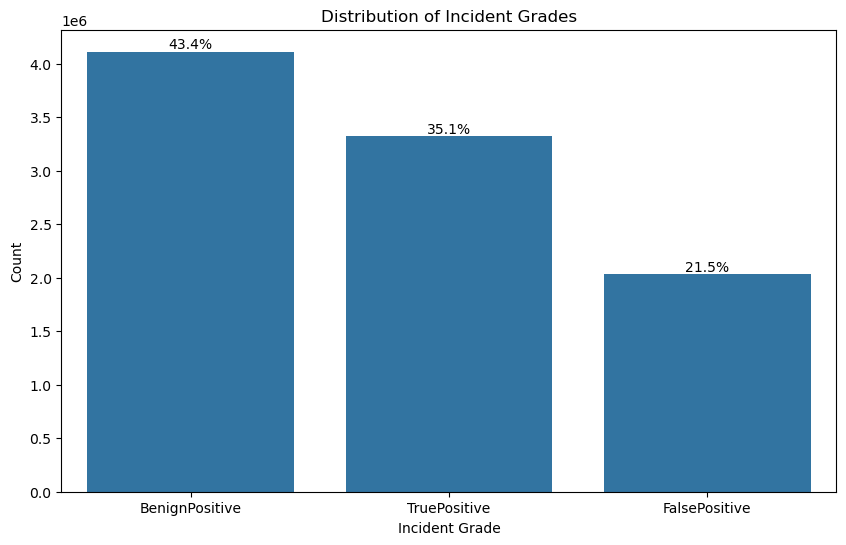

2. TIME SERIES ANALYSIS:


<Figure size 1200x600 with 0 Axes>

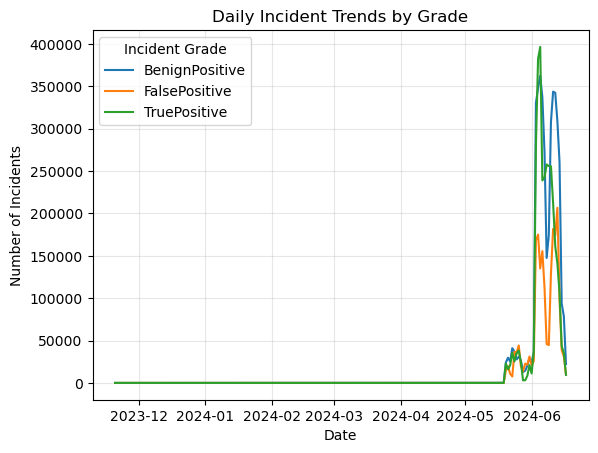

3. CATEGORY ANALYSIS:


<Figure size 1200x800 with 0 Axes>

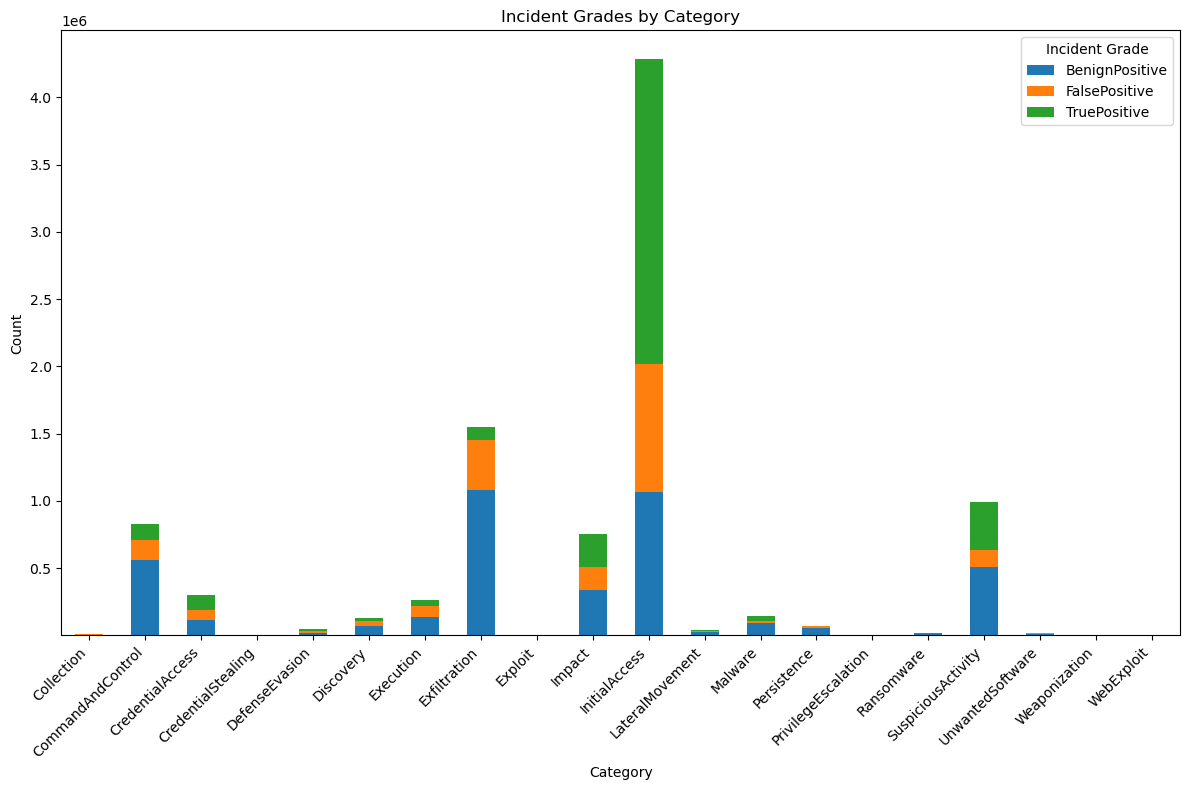

4. ENTITY TYPE ANALYSIS:


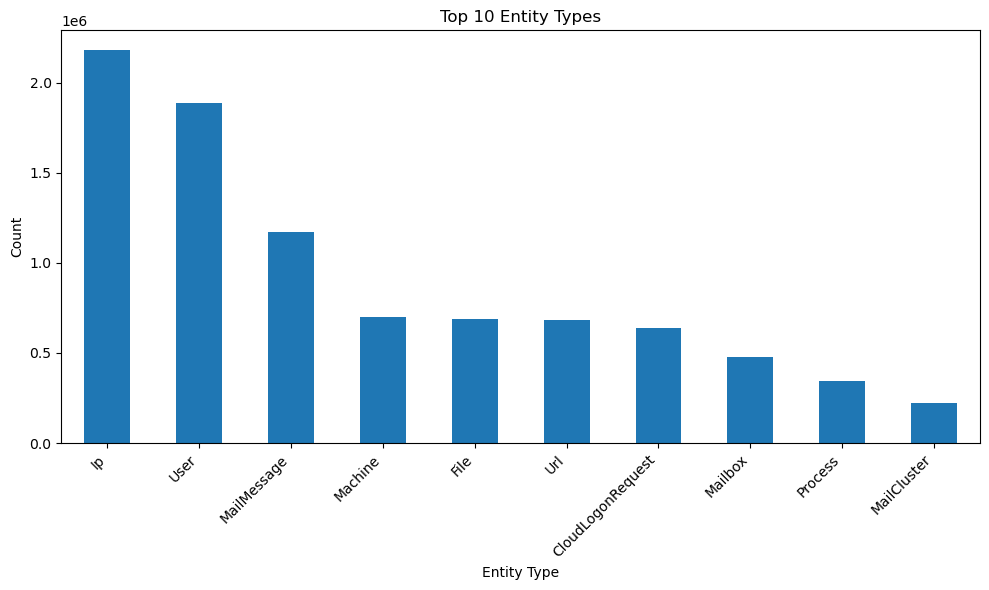

5. CORRELATION ANALYSIS:


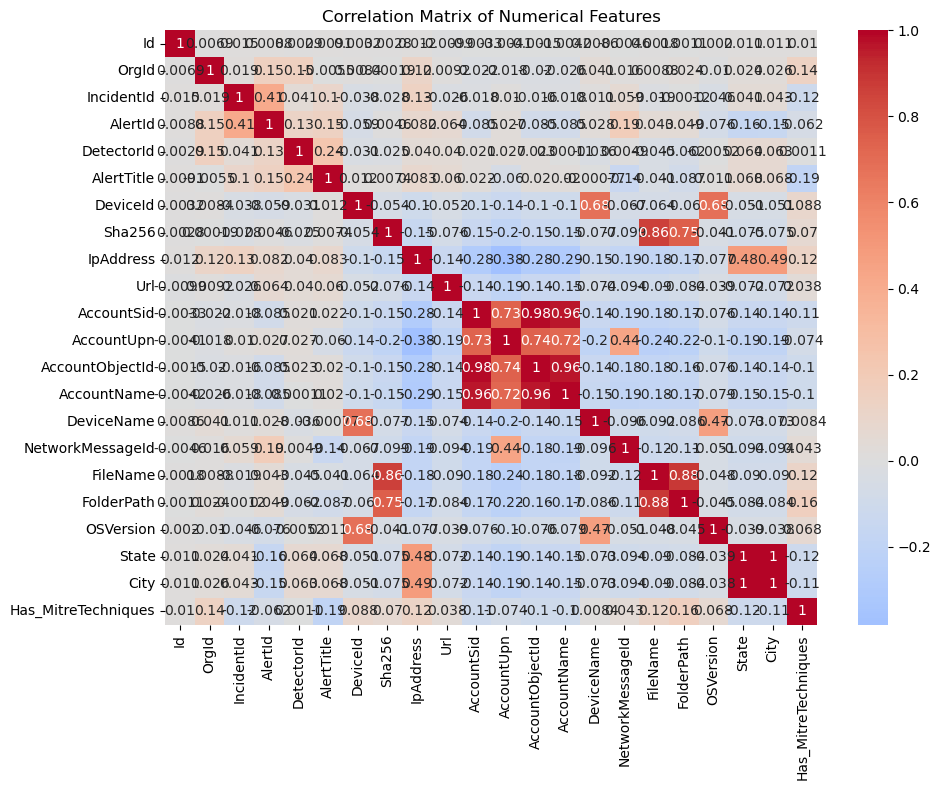

EDA completed! Now we can see patterns and relationships in the data.


In [31]:

print("EXPLORATORY DATA ANALYSIS (EDA)")


# 1. Target Variable Analysis
print("1. TARGET VARIABLE - IncidentGrade Distribution:")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean, x='IncidentGrade', order=df_clean['IncidentGrade'].value_counts().index)
plt.title('Distribution of Incident Grades')
plt.xlabel('Incident Grade')
plt.ylabel('Count')

# Add percentage labels on bars
total = len(df_clean)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')
plt.show()

# 2. Time Analysis
print("2. TIME SERIES ANALYSIS:")
df_clean['Date'] = df_clean['Timestamp'].dt.date
daily_incidents = df_clean.groupby(['Date', 'IncidentGrade']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
daily_incidents.plot(kind='line')
plt.title('Daily Incident Trends by Grade')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend(title='Incident Grade')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Category Analysis
print("3. CATEGORY ANALYSIS:")
plt.figure(figsize=(12, 8))
category_grade = pd.crosstab(df_clean['Category'], df_clean['IncidentGrade'])
category_grade.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Incident Grades by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Incident Grade')
plt.tight_layout()
plt.show()

# 4. Entity Type Analysis
print("4. ENTITY TYPE ANALYSIS:")
plt.figure(figsize=(10, 6))
entity_counts = df_clean['EntityType'].value_counts().head(10)
entity_counts.plot(kind='bar')
plt.title('Top 10 Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Correlation Analysis (for numerical features)
print("5. CORRELATION ANALYSIS:")
numerical_features = df_clean.select_dtypes(include=[np.number]).columns
if len(numerical_features) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_clean[numerical_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

print("EDA completed! Now we can see patterns and relationships in the data.")

In [37]:
print("=" * 60)
print("FEATURE ENGINEERING & PREPROCESSING")
print("=" * 60)

# 1. Encode categorical variables
print("1. ENCODING CATEGORICAL VARIABLES:")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode target variable
le = LabelEncoder()
df_clean['IncidentGrade_encoded'] = le.fit_transform(df_clean['IncidentGrade'])
print(f"   Target encoded: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Identify categorical columns to encode
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop('IncidentGrade', errors='ignore')  # Remove target

print("   Categorical columns to encode:", categorical_cols.tolist())

# One-hot encode low cardinality categorical features
low_cardinality_cols = [col for col in categorical_cols if df_clean[col].nunique() <= 10]
high_cardinality_cols = [col for col in categorical_cols if df_clean[col].nunique() > 10]

print(f"   Low cardinality ({len(low_cardinality_cols)}): {low_cardinality_cols}")
print(f"   High cardinality ({len(high_cardinality_cols)}): {high_cardinality_cols}")

# One-hot encode low cardinality features
df_encoded = pd.get_dummies(df_clean, columns=low_cardinality_cols, drop_first=True)

# Label encode high cardinality features (or consider other techniques)
for col in high_cardinality_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# 2. Create time-based features
print("\n2. CREATING TIME-BASED FEATURES:")
df_encoded['Hour'] = df_encoded['Timestamp'].dt.hour
df_encoded['DayOfWeek'] = df_encoded['Timestamp'].dt.dayofweek
df_encoded['Month'] = df_encoded['Timestamp'].dt.month
df_encoded['IsWeekend'] = (df_encoded['DayOfWeek'] >= 5).astype(int)

print("   Created features: Hour, DayOfWeek, Month, IsWeekend")

# 3. Drop unnecessary columns
print("\n3. DROPPING UNNECESSARY COLUMNS:")
columns_to_drop = ['Timestamp', 'IncidentGrade']  # Keep encoded target
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')
print(f"   Dropped: {columns_to_drop}")

# 4. Handle class imbalance (we'll use class weights during modeling)
print("\n4. CLASS IMBALANCE HANDLING:")
class_counts = df_clean['IncidentGrade'].value_counts()
class_weights = {i: sum(class_counts) / (len(class_counts) * count) 
                for i, count in enumerate(class_counts)}
print("   Class weights for modeling:", class_weights)

print(f"\nFinal dataset shape: {df_encoded.shape}")


FEATURE ENGINEERING & PREPROCESSING
1. ENCODING CATEGORICAL VARIABLES:
   Target encoded: {'BenignPositive': 0, 'FalsePositive': 1, 'TruePositive': 2}
   Categorical columns to encode: ['Category', 'MitreTechniques', 'EntityType', 'EvidenceRole', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'ResourceIdName', 'OSFamily', 'SuspicionLevel', 'LastVerdict', 'CountryCode', 'Date']
   Low cardinality (4): ['EvidenceRole', 'OSFamily', 'SuspicionLevel', 'LastVerdict']
   High cardinality (12): ['Category', 'MitreTechniques', 'EntityType', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'ResourceIdName', 'CountryCode', 'Date']

2. CREATING TIME-BASED FEATURES:
   Created features: Hour, DayOfWeek, Month, IsWeekend

3. DROPPING UNNECESSARY COLUMNS:
   Dropped: ['Timestamp', 'IncidentGrade']

4. CLASS IMBALANCE HANDLING:
   Class weights for modeling: {0: 0.76752

In [39]:
df_encoded

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,EntityType,DeviceId,...,SuspicionLevel_Unknown,LastVerdict_DomainPII_9207384283ce115db5a590dd9ca5de21e5e99df2,LastVerdict_Malicious,LastVerdict_NoThreatsFound,LastVerdict_Suspicious,LastVerdict_Unknown,Hour,DayOfWeek,Month,IsWeekend
0,180388628218,0,612,123247,7,6,10,1162,15,98799,...,True,False,False,False,False,True,6,1,6,0
1,455266534868,88,326,210035,58,43,7,1162,32,98799,...,True,False,False,False,False,True,3,4,6,0
2,1056561957389,809,58352,712507,423,298,10,837,31,98799,...,False,False,False,False,True,False,4,3,6,0
3,1279900258736,92,32992,774301,2,2,1,1162,31,98799,...,False,False,False,False,True,False,16,0,6,0
4,214748368522,148,4359,188041,9,74,6,1162,32,98799,...,True,False,False,False,False,True,1,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,10,1162,6,98799,...,True,False,False,False,False,True,15,5,6,1
9516833,1228360650033,59,196410,748366,2,2,1,1162,31,98799,...,False,False,False,False,True,False,9,3,6,0
9516834,867583395122,44,14117,7425,78,57,7,1162,21,98799,...,True,False,False,False,False,True,22,1,6,0
9516835,395136991850,43,644,8973,52,10,9,1162,15,98799,...,True,False,False,False,False,True,23,0,5,0


In [41]:
df_encoded.to_csv(r"C:\Users\Admin\OneDrive\Desktop\cybersecutity\df_encoded.csv", index=False)

In [33]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('IncidentGrade_encoded',axis=1)
y = df_encoded['IncidentGrade_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target distribution - Train: {y_train.value_counts().to_dict()}")
print(f"Target distribution - Test: {y_test.value_counts().to_dict()}")

Training set: (7572397, 48)
Test set: (1893100, 48)
Target distribution - Train: {0: 3288653, 2: 2658170, 1: 1625574}
Target distribution - Test: {0: 822164, 2: 664543, 1: 406393}


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

logreg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print(f"Macro F1: {f1_score(y_test, y_pred_logreg, average='macro'):.4f}")

dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred_dtree))
print(f"Macro F1: {f1_score(y_test, y_pred_dtree, average='macro'):.4f}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.52      0.41      0.46    822164
           1       0.21      0.29      0.24    406393
           2       0.45      0.46      0.45    664543

    accuracy                           0.40   1893100
   macro avg       0.39      0.39      0.38   1893100
weighted avg       0.43      0.40      0.41   1893100

Macro F1: 0.3850

Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    822164
           1       1.00      1.00      1.00    406393
           2       1.00      1.00      1.00    664543

    accuracy                           1.00   1893100
   macro avg       1.00      1.00      1.00   1893100
weighted avg       1.00      1.00      1.00   1893100

Macro F1: 0.9968


In [37]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Macro F1: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

xgb = XGBClassifier(random_state=42, eval_metric='mlogloss', n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"Macro F1: {f1_score(y_test, y_pred_xgb, average='macro'):.4f}")

Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    822164
           1       0.98      0.97      0.98    406393
           2       0.99      0.98      0.99    664543

    accuracy                           0.98   1893100
   macro avg       0.98      0.98      0.98   1893100
weighted avg       0.98      0.98      0.98   1893100

Macro F1: 0.9817

XGBoost Results:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    822164
           1       0.94      0.84      0.89    406393
           2       0.94      0.91      0.93    664543

    accuracy                           0.92   1893100
   macro avg       0.92      0.90      0.91   1893100
weighted avg       0.92      0.92      0.92   1893100

Macro F1: 0.9125


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

rf_tuned = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)

print("Tuned Random Forest Results:")
print(classification_report(y_test, y_pred_tuned))
print(f"Macro F1: {f1_score(y_test, y_pred_tuned, average='macro'):.4f}")

Tuned Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91    822164
           1       0.86      0.90      0.88    406393
           2       0.98      0.85      0.91    664543

    accuracy                           0.91   1893100
   macro avg       0.91      0.90      0.90   1893100
weighted avg       0.91      0.91      0.91   1893100

Macro F1: 0.9027


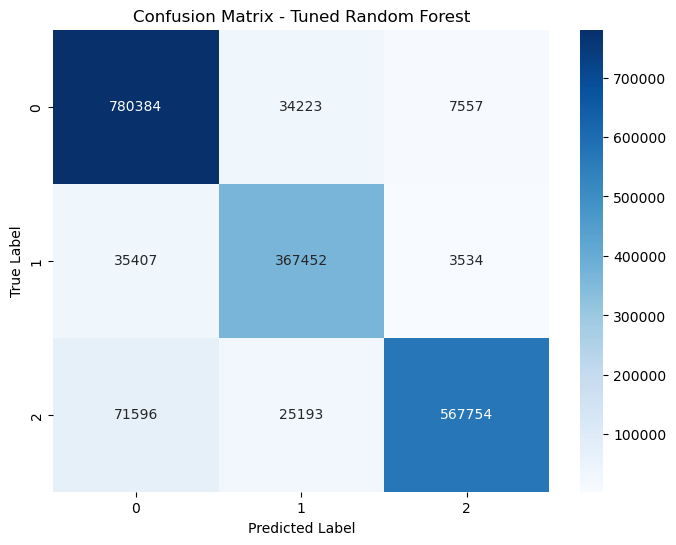

BenignPositive: Precision=0.879, Recall=0.949
FalsePositive: Precision=0.861, Recall=0.904
TruePositive: Precision=0.981, Recall=0.854


In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

class_names = ['BenignPositive', 'FalsePositive', 'TruePositive']
for i, name in enumerate(class_names):
    precision = cm[i,i] / cm[:,i].sum()
    recall = cm[i,i] / cm[i,:].sum()
    print(f"{name}: Precision={precision:.3f}, Recall={recall:.3f}")